<a href="https://colab.research.google.com/github/slvr2604/Entregas-laboratorio-digitales/blob/main/Laboratorio_1_digitales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install wfdb #instalacion en colab
import wfdb
import random

In [ ]:
from google.colab import files
uploaded=files.upload ()



Saving b001.dat to b001 (3).dat
Saving b001.hea to b001 (3).hea


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
signals, fields=wfdb.rdsamp("/content/drive/MyDrive/Colab Notebooks/b001")
fields

{'fs': 5000,
 'sig_len': 1360050,
 'n_sig': 4,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV', 'mV', 'mV'],
 'sig_name': ['I', 'II', 'RESP', 'SCG'],
 'comments': ['Baseline for subject 1']}

/tmp/ipython-input-2280261209.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


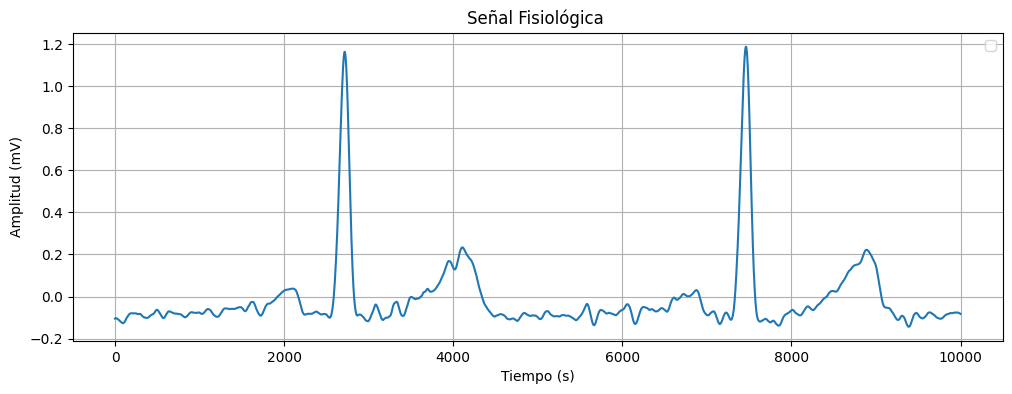

In [ ]:
signal= signals[80000:90000]
plt.figure(figsize=(12, 4))
plt.plot(signal[:,0])
plt.title('Señal Fisiológica ')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Cálculo de datos estadísticos con funciones.
datos = signal[:,0]


media = np.mean(datos)
desviacion = np.std(datos, ddof=1)
coef_var = (desviacion / media)*100

print("Media:", media)
print("Desviación estándar:", desviacion)
print("Coeficiente de variación:", coef_var)

Media: -0.014106341399538005
Desviación estándar: 0.1809944385724113
Coeficiente de variación: -12.830714459976067


Frecuencias (conteo):  [1557 4755 1121  998  298  178  363  237  141   18   14   14   15   14
   13   13   12   12   13   13   13   13   14   14   16   16   18   19
   29   49]
Bordes de bins (mV):  [-0.14340779 -0.09904607 -0.05468435 -0.01032263  0.03403909  0.0784008
  0.12276252  0.16712424  0.21148596  0.25584768  0.3002094   0.34457111
  0.38893283  0.43329455  0.47765627  0.52201799  0.56637971  0.61074142
  0.65510314  0.69946486  0.74382658  0.7881883   0.83255001  0.87691173
  0.92127345  0.96563517  1.00999689  1.05435861  1.09872032  1.14308204
  1.18744376]


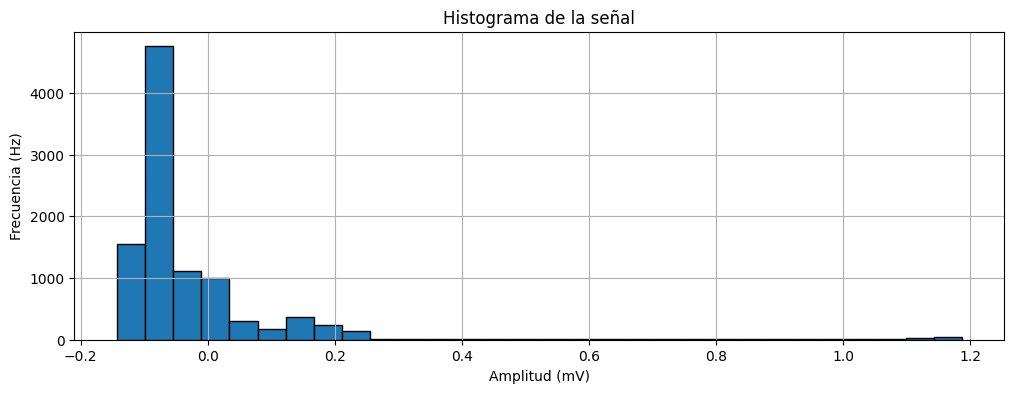

In [ ]:
#Histograma FUNCIONES

datos = signal[:,0]
valores, bordes = np.histogram(datos, bins = 30)
print("Frecuencias (conteo): ", valores)
print ("Bordes de bins (mV): ", bordes)

#Gráfica histograma FUNCIONES

plt.figure(figsize=(12, 4))
plt.hist(datos, bins = 30, edgecolor = "black")
plt.xlabel("Amplitud (mV)")
plt.ylabel("Frecuencia (Hz)")
plt.title("Histograma de la señal")
plt.grid(True)
plt.show()

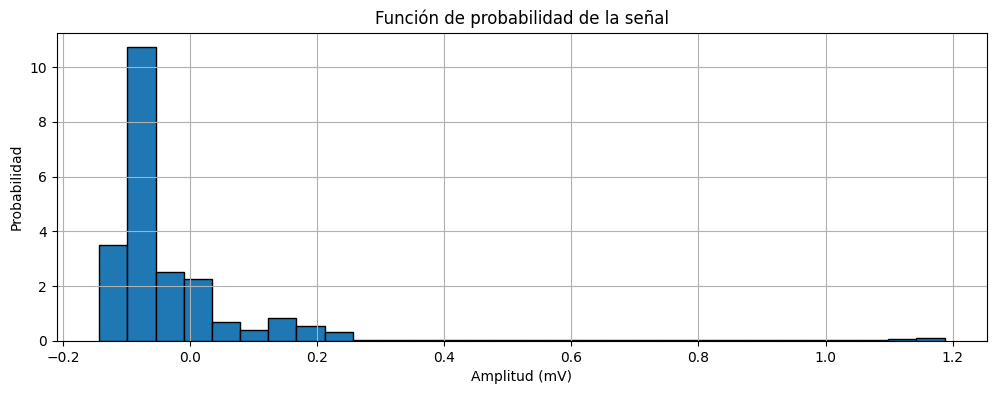

In [ ]:
#Función de probabilidad
datos = signal[:,0]
valores, bordes = np.histogram(datos, bins = 30, density = True)
centros = (bordes[:-1] + bordes[1:])/2
plt.figure(figsize=(12, 4))
plt.bar(centros, valores, width = (bordes[1] - bordes[0]), edgecolor = "black")
plt.xlabel("Amplitud (mV)")
plt.ylabel("Probabilidad")
plt.title("Función de probabilidad de la señal")
plt.grid(True)
plt.show()

In [ ]:

from scipy.stats import kurtosis

datos = signal[:,0]
curtosis_scipy = kurtosis(datos, fisher=True)
print("Curtosis con SciPy:", curtosis_scipy)

Curtosis con SciPy: 21.850227609596285


#Funciones manuales:

In [ ]:
#MEDIA MANUAL
cont=0
sum=0
for valor in signal[:,0]:
  sum=sum+valor
  cont=cont+1
media_manual=sum/cont

print("Media:", media_manual)

Media: -0.014106341399537866


In [ ]:
#DESVIACION ESTANDAR MANUAL

sum_a = 0
for valor in signal[:, 0]:
    sum_a = sum_a + (valor - media_manual)**2
desviacion_manual = (sum_a / cont)** 0.5

print("Desviacion estandar:", desviacion_manual)


Desviacion estandar: 0.18098538862422764


In [ ]:
#COEFICIENTE VARIACION
coef=(desviacion_manual/(media_manual))*100
print("Coeficiente de variacion:", coef)

Coeficiente de variacion: 1283.007290821395


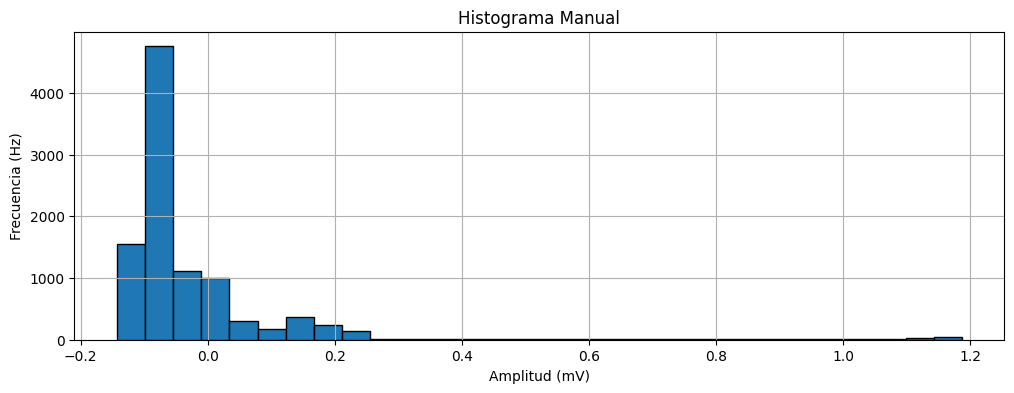

Valor mínimo: -0.1434077873293117
Valor máximo: 1.1874437609651838
Ancho de cada bin: 0.044361718276483185


In [ ]:
# HISTOGRAMA MANUAL

amplitudes_senal = signal[:,0]
num_bins = 30
min_amplitud = min(amplitudes_senal)
max_amplitud = max(amplitudes_senal)
ancho_bin = (max_amplitud - min_amplitud) / num_bins
limites_bins = [min_amplitud + i * ancho_bin for i in range(num_bins + 1)]

frecuencias_manual = [0] * num_bins
for amplitud in amplitudes_senal:
    for i in range(num_bins):
        if limites_bins[i] <= amplitud < limites_bins[i+1]:
            frecuencias_manual[i] += 1
            break
centros_bin = [min_amplitud + (i + 0.5) * ancho_bin for i in range(num_bins)]

plt.figure(figsize=(12, 4))
plt.bar(centros_bin, frecuencias_manual, width=ancho_bin, align='center', edgecolor='black')
plt.xlabel('Amplitud (mV)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Histograma Manual')
plt.grid(True)
plt.show()

#Visualización de datos calculados
print("Valor mínimo:", min_amplitud)
print("Valor máximo:", max_amplitud)
print("Ancho de cada bin:", ancho_bin)

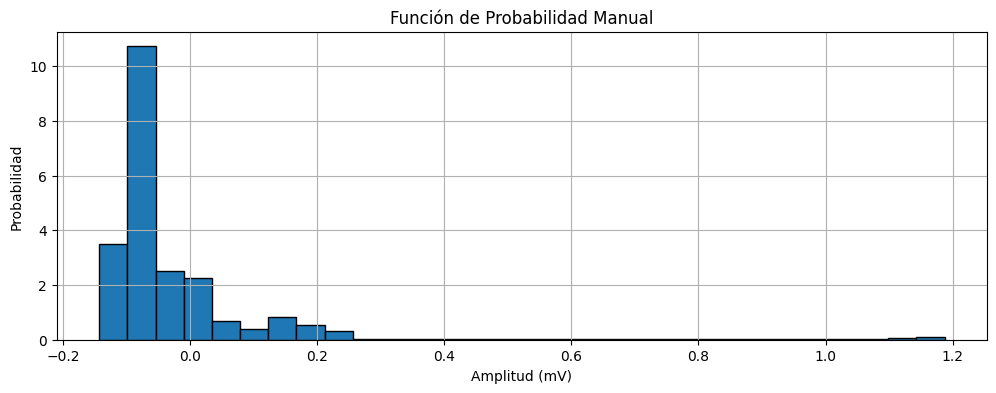

In [ ]:
#FUNCION PROBABILIDAD manual
N_muestras = len(datos)
ancho_bin_prob = ancho_bin
frecuencias_prob = frecuencias_manual
pdf_manual = [frecuencia / (N_muestras * ancho_bin_prob) for frecuencia in frecuencias_prob]
centros_bin_prob = centros_bin


plt.figure(figsize=(12, 4))
plt.bar(centros_bin_prob, pdf_manual, width=ancho_bin_prob, align='center', edgecolor='black')
plt.xlabel('Amplitud (mV)')
plt.ylabel('Probabilidad')
plt.title('Función de Probabilidad Manual')
plt.grid(True)
plt.show()

In [ ]:
datos2 = np.array(datos)
media = np.mean(datos2)
m2 = np.mean((datos2 - media)**2)
m4 = np.mean((datos2 - media)**4)

curtosis_manual = m4 / (m2**2) - 3
print("La curtosis es:", curtosis_manual)

La curtosis es: 21.850227609596285


#**PARTE B**






In [ ]:
from google.colab import files
uploaded = files.upload()


Saving senal_DAQ.txt to senal_DAQ (1).txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Datos cargados correctamente. Primeros valores:
[[ 0.00000000e+00 -1.06854338e+00]
 [ 2.00000000e-04 -1.19833279e+00]
 [ 4.00000000e-04 -1.29076347e+00]
 [ 6.00000000e-04 -1.32651192e+00]
 [ 8.00000000e-04 -1.33359720e+00]
 [ 1.00000000e-03 -1.33810601e+00]
 [ 1.20000000e-03 -1.36644712e+00]
 [ 1.40000000e-03 -1.50267770e+00]
 [ 1.60000000e-03 -1.76225652e+00]
 [ 1.80000000e-03 -1.83536371e+00]]


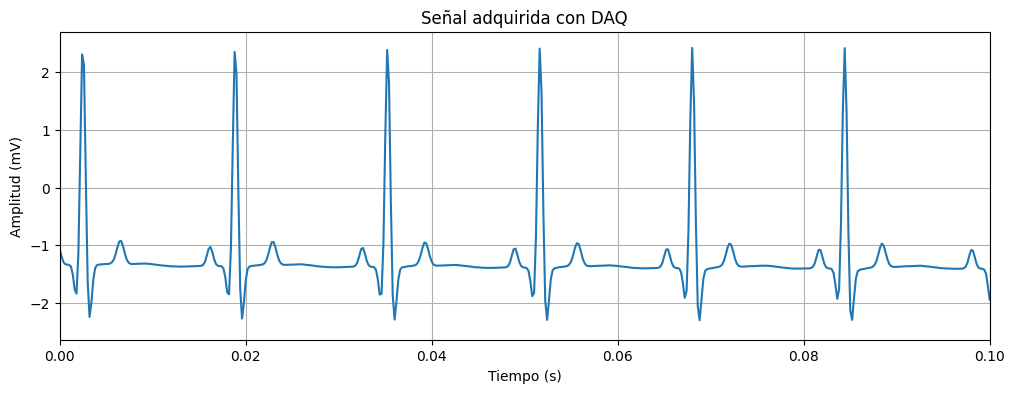

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ruta = "/content/drive/MyDrive/Colab Notebooks/senal_DAQ.txt"

try:

    datos = np.loadtxt(ruta, skiprows=1)

    print("Datos cargados correctamente. Primeros valores:")
    print(datos[:10])

    tiempo = datos[:, 0]
    senal = datos[:, 1]

    plt.figure(figsize=(12, 4))
    plt.plot(tiempo, senal)
    plt.title('Señal adquirida con DAQ')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud (mV)')
    plt.grid(True)

    plt.xlim(0, 0.1)
    plt.show()

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {ruta}")
    print("Por favor, verifica que el archivo esté en la ruta correcta o súbelo de nuevo.")
except Exception as e:
    print(f"Ocurrió un error: {e}")


In [ ]:

media = np.mean(senal)
desviacion_estandar = np.std(senal)
min_valor = np.min(senal)
max_valor = np.max(senal)
rango = max_valor - min_valor

if media != 0:
    coeficiente_variacion = (desviacion_estandar / abs(media)) * 100
else:
    coeficiente_variacion = float('inf')

print(f"Estadísticas Descriptivas de la Señal:")
print(f"  Media: {media:.4f}")
print(f"  Desviación Estándar: {desviacion_estandar:.4f}")
print(f"  Valor Mínimo: {min_valor:.4f}")
print(f"  Valor Máximo: {max_valor:.4f}")
print(f"  Rango: {rango:.4f}")
print(f"  Coeficiente de Variación: {coeficiente_variacion:.4f}%")


Estadísticas Descriptivas de la Señal:
  Media: -1.2833
  Desviación Estándar: 0.6300
  Valor Mínimo: -2.3909
  Valor Máximo: 2.4551
  Rango: 4.8460
  Coeficiente de Variación: 49.0944%


In [ ]:
from scipy.stats import kurtosis

curt = kurtosis(senal)
print(f"Curtosis de la señal: {curt:.4f}")

Curtosis de la señal: 19.1574


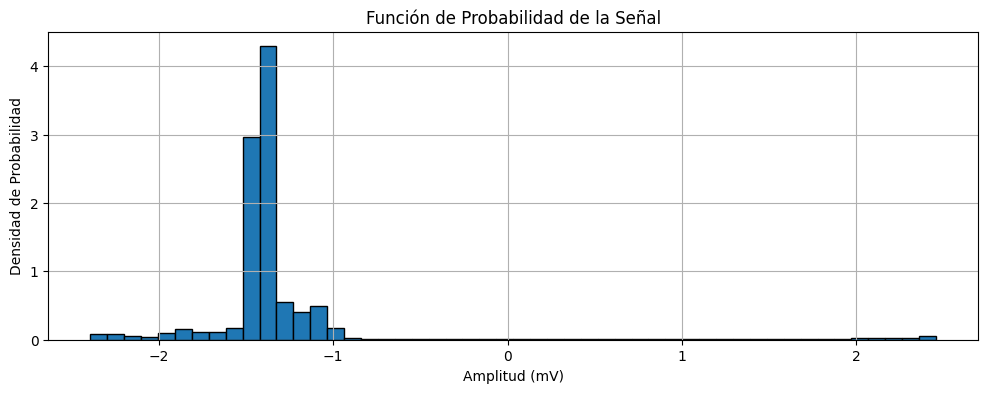

In [ ]:
# Función de Probabilidad (usando histograma con density=True)
plt.figure(figsize=(12, 4))
plt.hist(senal, bins=50, density=True, edgecolor='black')
plt.title('Función de Probabilidad de la Señal')
plt.xlabel('Amplitud (mV)')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True)
plt.show()

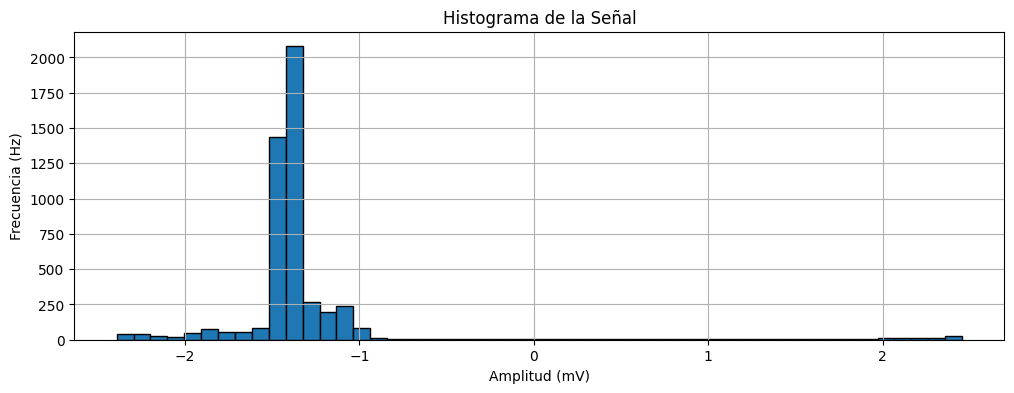

In [ ]:
# Histograma
plt.figure(figsize=(12, 4))
plt.hist(senal, bins=50, edgecolor='black')
plt.title('Histograma de la Señal')
plt.xlabel('Amplitud (mV)')
plt.ylabel('Frecuencia (Hz)')
plt.grid(True)
plt.show()

#Parte C:
Relación Señal Ruido (SNR)


SNR deseado: 10.00 dB
Desviación Estándar del Ruido Calculado: 0.4521
SNR real de la señal con ruido: 10.04 dB


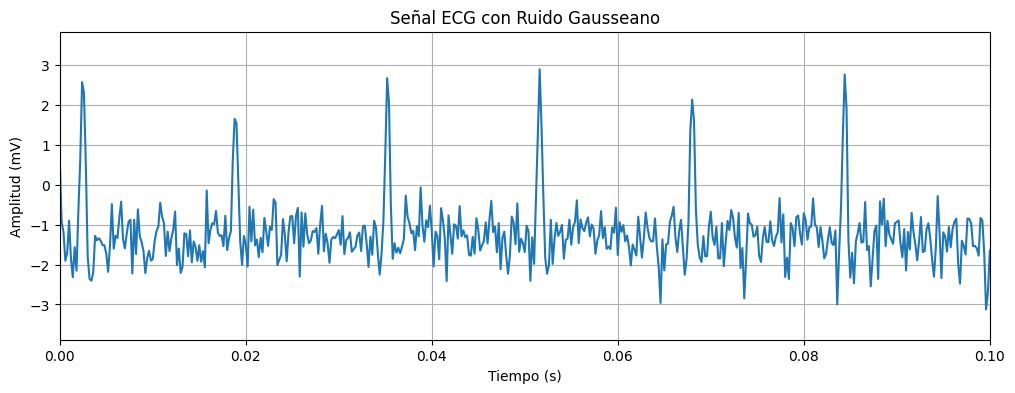

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Añadir ruido Gaussiano a la señal y calcular SNR (Relación Señal-Ruido)

# Definir el SNR deseado en decibelios (dB) - puedes ajustar este valor
snr_deseado_db = 10

# Calcular la potencia de la señal original
potencia_senal = np.mean(senal**2)

# Calcular la potencia de ruido requerida basándose en el SNR deseado
# SNR_db = 10 * log10(potencia_senal / potencia_ruido)
# potencia_ruido = potencia_senal / (10**(snr_deseado_db / 10))
potencia_ruido = potencia_senal / (10**(snr_deseado_db / 10))


# Generar ruido Gaussiano con la potencia calculada
# La desviación estándar del ruido es la raíz cuadrada de la potencia del ruido
desv_esta_ruido = np.sqrt(potencia_ruido)
ruido = np.random.normal(0, desv_esta_ruido, len(senal))

# Añadir el ruido a la señal
senal_con_ruido = senal + ruido

# Calcular el SNR real de la señal con ruido
# SNR = (Potencia de la Señal) / (Potencia del Ruido)
# SNR_db = 10 * log10(SNR)
potencia_ruido_real = np.mean(ruido**2)
snr_real = potencia_senal / potencia_ruido_real
snr_real_db = 10 * np.log10(snr_real)


print(f"SNR deseado: {snr_deseado_db:.2f} dB")
print(f"Desviación Estándar del Ruido Calculado: {desv_esta_ruido:.4f}")
print(f"SNR real de la señal con ruido: {snr_real_db:.2f} dB")

# Opcional: Graficar la señal con ruido para visualizar el efecto del ruido
plt.figure(figsize=(12, 4))
plt.plot(tiempo, senal_con_ruido)
plt.title('Señal ECG con Ruido Gausseano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
# Mantener los mismos límites del eje x que la gráfica anterior para comparación
plt.xlim(0, 0.1)
plt.show()

SNR real de la señal con ruido de impulso: 9.28 dB


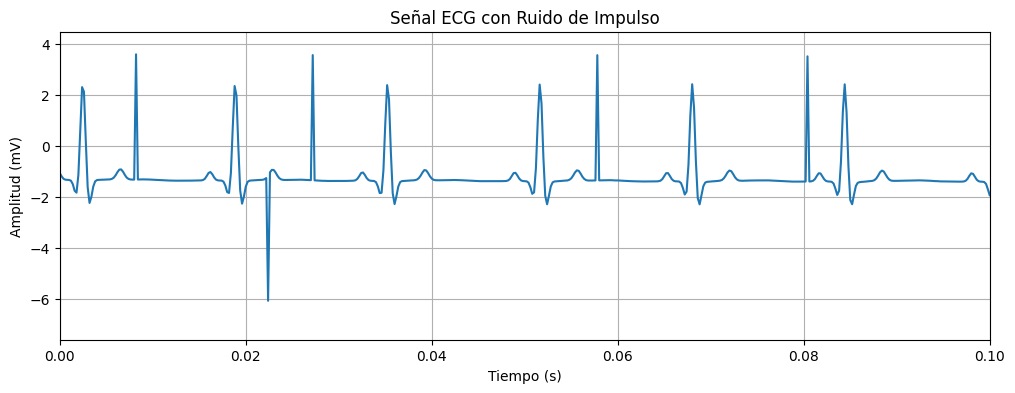

In [ ]:
# Añadir ruido de impulso a la señal original y calcular SNR

import random # Importa el módulo random

# Define el porcentaje de ruido de impulso que quieres añadir
porcentaje_ruido_impulso = 0.01 # 1% ruido de impulso

# Define la amplitud del ruido de impulso
amplitud_impulso = np.max(np.abs(senal)) * 2 # Dos veces la amplitud absoluta máxima de la señal original

# Crea una copia de la señal original
senal_ruidosa_impulso = np.copy(senal)

# Genera índices aleatorios para colocar el ruido de impulso
num_muestras_ruido = int(len(senal) * porcentaje_ruido_impulso)
indices_ruido = np.random.choice(len(senal), num_muestras_ruido, replace=False)

# Añade ruido de impulso en los índices seleccionados
for indice in indices_ruido:
    # Asigna aleatoriamente un impulso positivo o negativo
    valor_impulso = amplitud_impulso if random.random() > 0.5 else -amplitud_impulso
    senal_ruidosa_impulso[indice] += valor_impulso

# Calcula la potencia de la señal original
potencia_senal_original = np.mean(senal**2)

# Calcula la potencia del ruido de impulso (diferencia entre la señal ruidosa y la original)
ruido_impulso = senal_ruidosa_impulso - senal
potencia_ruido_impulso = np.mean(ruido_impulso**2)

# Calcula el SNR de la señal con ruido de impulso
# Maneja el caso en que la potencia del ruido es cero
if potencia_ruido_impulso > 0:
    snr_real_impulso = potencia_senal_original / potencia_ruido_impulso
    snr_real_impulso_db = 10 * np.log10(snr_real_impulso)
    print(f"SNR real de la señal con ruido de impulso: {snr_real_impulso_db:.2f} dB")
else:
    print("No se añadió ruido de impulso (la potencia del ruido es cero). El SNR es infinito.")


# Opcional: Grafica la señal con ruido de impulso para visualizar el efecto del ruido
plt.figure(figsize=(12, 4))
plt.plot(tiempo, senal_ruidosa_impulso)
plt.title('Señal ECG con Ruido de Impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
# Mantén los mismos límites del eje x que las gráficas anteriores para comparación
plt.xlim(0, 0.1)
plt.show()

SNR real de la señal con interferencia: 12.41 dB


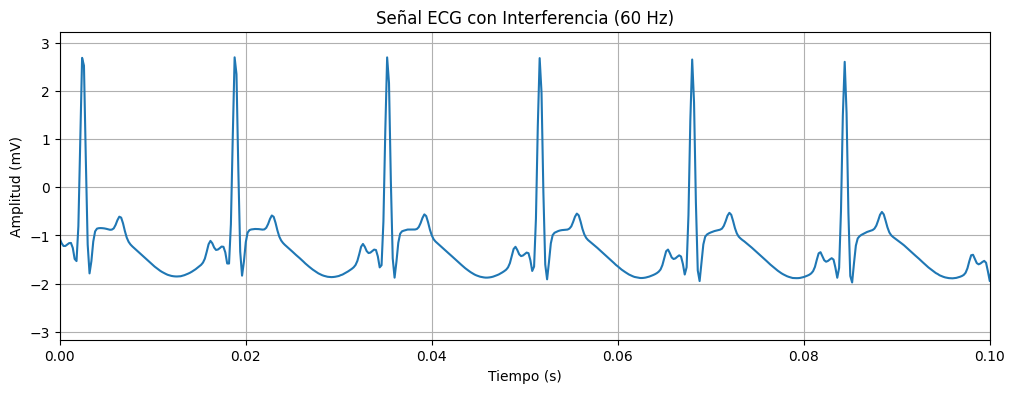

In [ ]:
# Añadir interferencia de línea de potencia (60 Hz) a la señal original y calcular SNR

# Definir la frecuencia de la interferencia de línea de potencia (en Hz)
frecuencia_interferencia = 60

# Definir la amplitud de la interferencia de línea de potencia.
# Puedes ajustar este valor para simular un nivel realista de interferencia.
# Empecemos con una pequeña amplitud relativa al rango pico a pico de la señal.
amplitud_interferencia = (np.max(senal) - np.min(senal)) * 0.1 # Ejemplo: 10% del rango pico a pico

# Crear un vector de tiempo para la señal de interferencia.
# Asegúrate de que tenga la misma longitud y escala de tiempo que la señal original.
# Podemos reutilizar la variable 'tiempo' calculada anteriormente si está disponible.
# Si no, necesitaríamos la frecuencia de muestreo (fs) para crearlo:
# tiempo = np.arange(0, len(senal)) / fs

# Generar la señal de interferencia de línea de potencia (una onda sinusoidal)
interferencia_linea_potencia = amplitud_interferencia * np.sin(2 * np.pi * frecuencia_interferencia * tiempo)

# Añadir la interferencia a la señal original
senal_con_interferencia = senal + interferencia_linea_potencia

# Calcular la potencia de la señal original
potencia_senal_original = np.mean(senal**2)

# Calcular la potencia del ruido de interferencia (diferencia entre la señal con ruido y la original)
ruido_interferencia = senal_con_interferencia - senal
potencia_ruido_interferencia = np.mean(ruido_interferencia**2)

# Calcular el SNR de la señal con interferencia
# Manejar el caso en el que la potencia del ruido es cero
if potencia_ruido_interferencia > 0:
    snr_real_interferencia = potencia_senal_original / potencia_ruido_interferencia
    snr_real_interferencia_db = 10 * np.log10(snr_real_interferencia)
    print(f"SNR real de la señal con interferencia: {snr_real_interferencia_db:.2f} dB")
else:
    print("No se añadió ruido de interferencia (la potencia del ruido es cero). El SNR es infinito.")


# Opcional: Graficar la señal con interferencia para visualizar el efecto del ruido
plt.figure(figsize=(12, 4))
plt.plot(tiempo, senal_con_interferencia)
plt.title('Señal ECG con Interferencia (60 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
# Mantener los mismos límites del eje x que las gráficas anteriores para comparación
plt.xlim(0, 0.1)
plt.show()